#  Importing all the requied libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

#  

#  Q 20) Calculate probability from the given dataset for the below cases

### Data _set: Cars.csv
### Calculate the probability of MPG  of Cars for the below cases.



In [2]:
# Importing the dataset

cars=pd.read_csv("Cars (1).csv")

In [3]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
cars.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [5]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


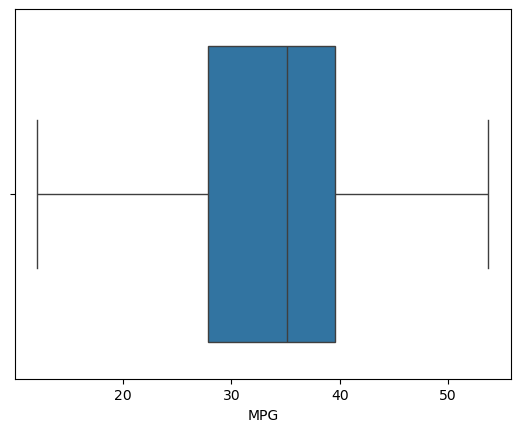

In [6]:
# Boxplot

sns.boxplot(x="MPG",data=cars,orient="h")
plt.show()

# Calculation 

In [7]:
Prob_MPG_greater_than_38=np.round(1-stats.norm.cdf(38,loc=cars.MPG.mean(),scale=cars.MPG.std()),3)
print("P(MPG>38)=",Prob_MPG_greater_than_38)

P(MPG>38)= 0.348


In [8]:
Prob_MPG_less_than_40=np.round(stats.norm.cdf(40,loc=cars.MPG.mean(),scale=cars.MPG.std()),3)
print("P(MPG<40)=",Prob_MPG_less_than_40)

P(MPG<40)= 0.729


In [9]:
Prob_MPG_greater_than_20 = np.round(1-stats.norm.cdf(20, loc = cars.MPG.mean(), scale = cars.MPG.std()),3)
print('p(MPG>20)=',(Prob_MPG_greater_than_20))

p(MPG>20)= 0.943


In [10]:
Prob_MPG_less_than_50=np.around(stats.norm.cdf(50,loc=cars.MPG.mean(),scale=cars.MPG.std()),3)
print("P(MPG<50)=",(Prob_MPG_less_than_50))

P(MPG<50)= 0.956


In [11]:
Prob_MPG_greater20_and_lessthan50=(Prob_MPG_less_than_50) - (Prob_MPG_greater_than_20)
print("P(20<MPG<50)=",(Prob_MPG_greater20_and_lessthan50))

P(20<MPG<50)= 0.013000000000000012


# 

# Question no:21-Check whether the data follows normal distribution
### a)	Check whether the MPG of Cars follows Normal Distribution 
### Dataset: Cars.csv


In [12]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Here our main agenda is whether the MPG of cars follows Normal Distribution or not.

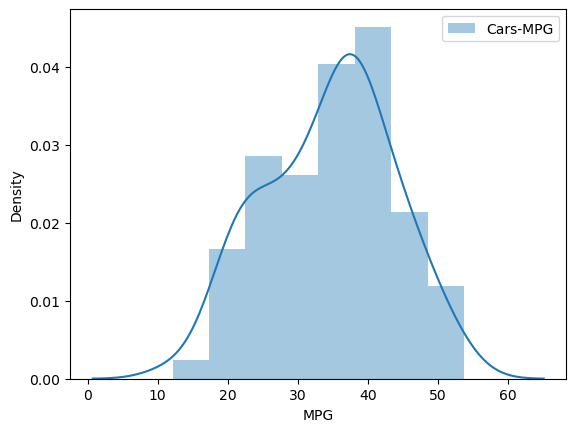

In [13]:
# Distplot

sns.distplot(cars.MPG,label="Cars-MPG")
plt.xlabel("MPG")
plt.ylabel("Density")
plt.legend()
plt.show()

In [14]:
# Calculating the MEAN value

cars.MPG.mean()

34.42207572802469

In [15]:
# Calculating the Median Value

cars.MPG.median()

35.15272697

In [16]:
# Calculating the Skew

cars.skew()

HP     1.716216
MPG   -0.177947
VOL   -0.590197
SP     1.611450
WT    -0.614753
dtype: float64

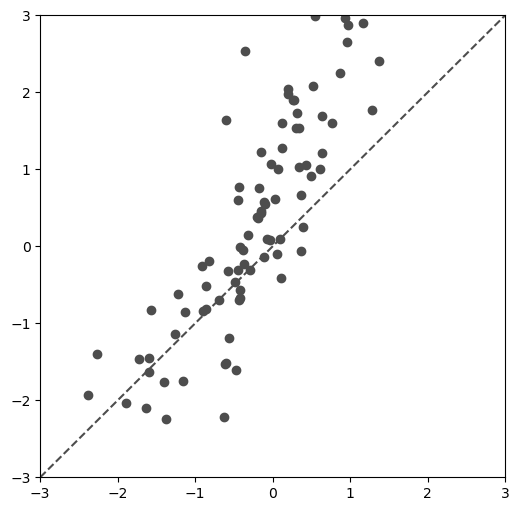

In [17]:
mean, cov = [0, 0], [(1, .6), (.6, 1)]
x, y = np.random.multivariate_normal(mean, cov, 100).T
y += x + 1

f, ax = plt.subplots(figsize=(6, 6))

ax.scatter(x, y, c=".3")
ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Plot the initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

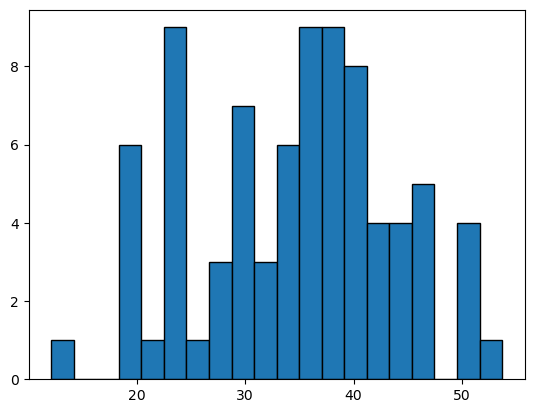

In [18]:
# Hisplot

plt.hist(cars["MPG"],bins=20,edgecolor="black")
plt.show

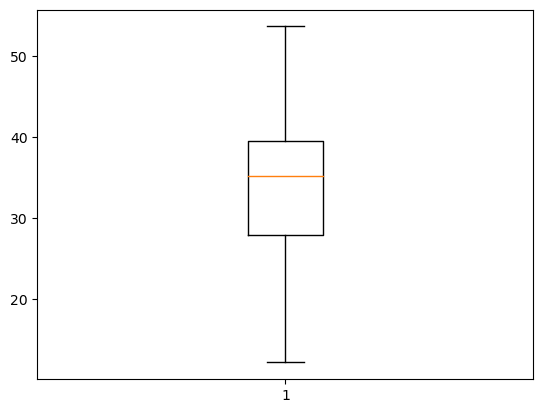

In [19]:
# Boxplot

plt.boxplot(x="MPG",data=cars)
plt.show()

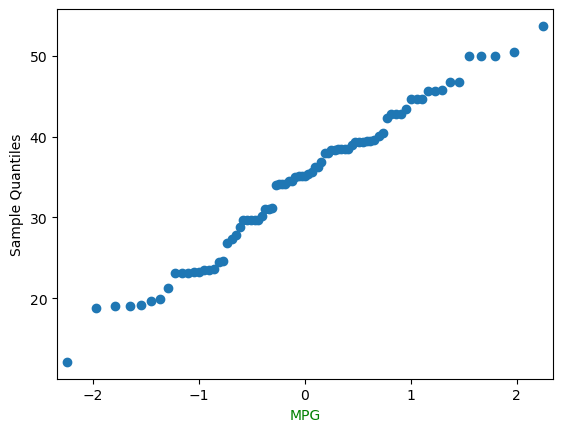

In [20]:
# qq-plot

sm.qqplot(cars["MPG"])
plt.xlabel("MPG",color="green")
plt.show()

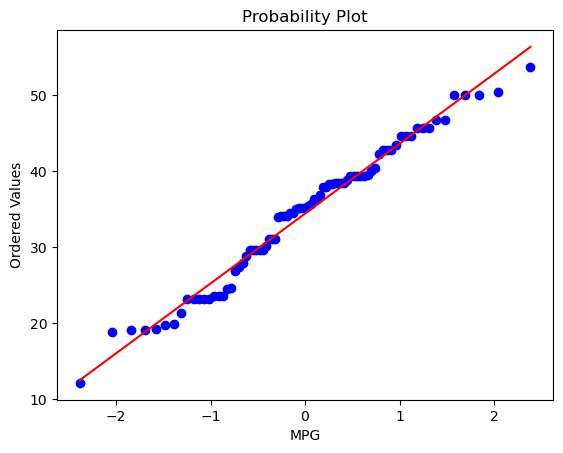

In [21]:
# Probability Plot

stats.probplot(cars["MPG"],dist="norm",plot=plt)
plt.xlabel("MPG",color="black")
plt.show()

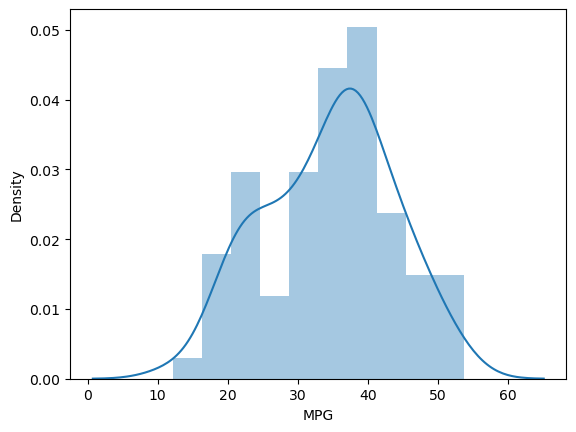

In [22]:
sns.distplot(cars["MPG"],kde=True,bins=10)
plt.show()

# b) Check Whether the Adipose Tissue (AT) and Waist Circumference (Waist) from wc-at data set follows Normal Distribution 
### Dataset: wc-at.csv


In [23]:
wc_at=pd.read_csv("wc-at (1).csv")

In [24]:
wc_at

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [25]:
wc_at.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [26]:
wc_at.tail()

,Waist,AT
104,100.1,124.0
105,93.3,62.2
106,101.8,133.0
107,107.9,208.0
108,108.5,208.0


In [27]:
wc_at.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [28]:
wc_at.mean()

Waist     91.901835
AT       101.894037
dtype: float64

In [29]:
wc_at.median()

Waist    90.80
AT       96.54
dtype: float64

In [30]:
# waist is multimodal, AT is bimodal data

wc_at.mode()

,Waist,AT
0,94.5,121.0
1,106.0,123.0
2,108.5,NaN


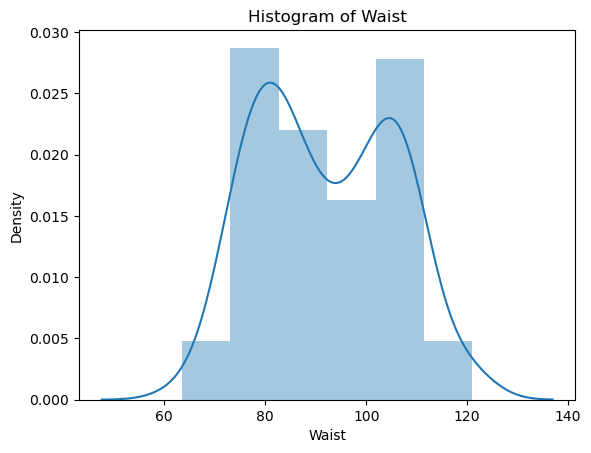

In [31]:
# Distplot

sns.distplot(wc_at["Waist"])
plt.title("Histogram of Waist")
plt.show()

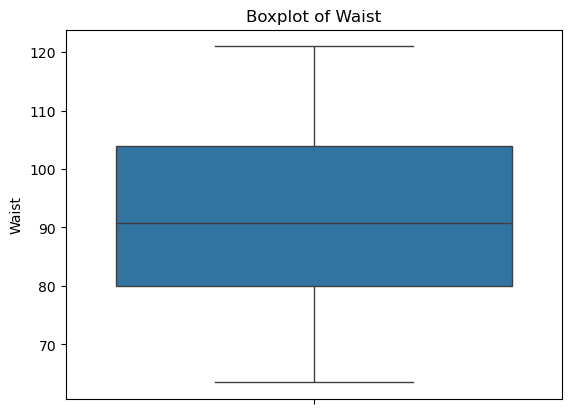

In [32]:
# Boxplot

sns.boxplot(wc_at["Waist"])
plt.title("Boxplot of Waist")
plt.show()


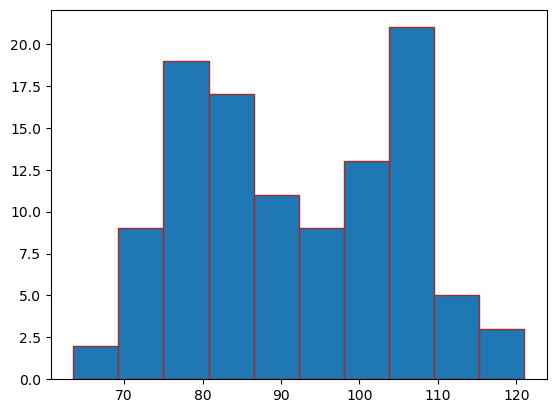

In [33]:
# Histplot

plt.hist(wc_at["Waist"],edgecolor="brown")
plt.show()

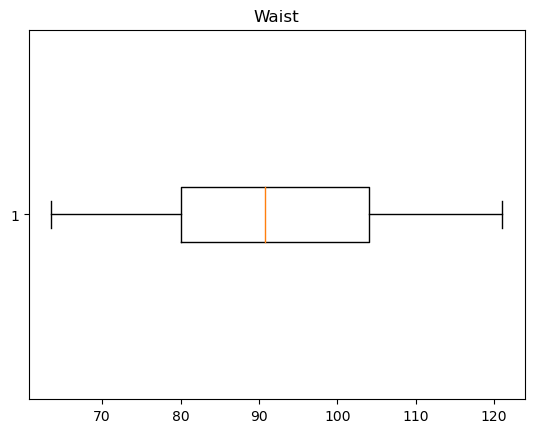

In [34]:
# Boxplot

plt.boxplot(x="Waist",data=wc_at,vert=False)
plt.title("Waist")
plt.show()

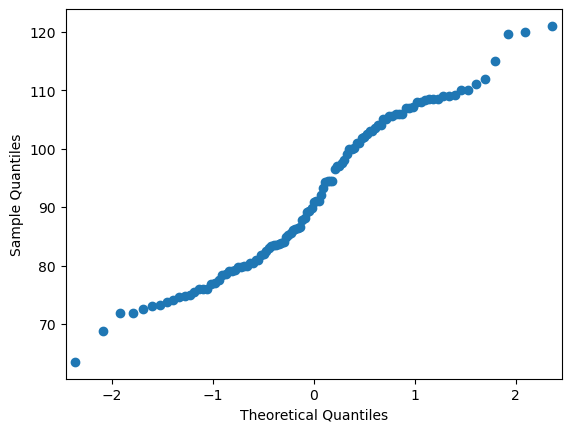

In [35]:
sm.qqplot(wc_at["Waist"])
plt.show()

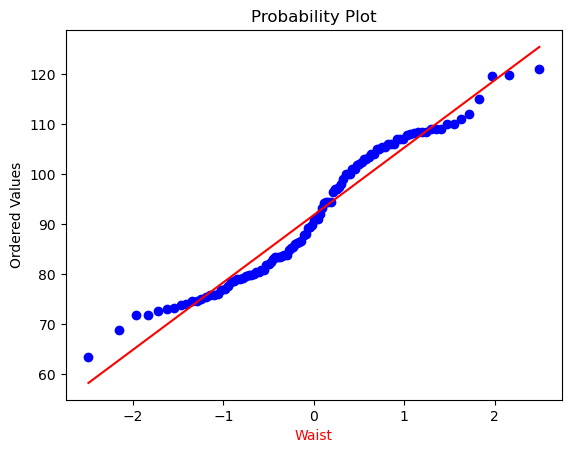

In [36]:
# Probability Plot

stats.probplot(wc_at["Waist"],dist="norm",plot=plt)
plt.xlabel("Waist",color="red")
plt.show()

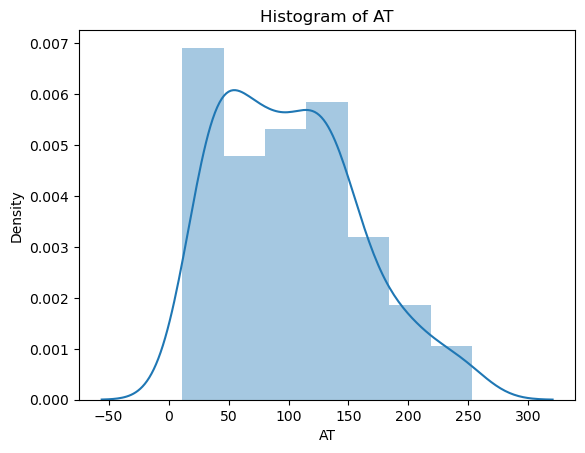

In [37]:
# Distplot

sns.distplot(wc_at["AT"])
plt.title("Histogram of AT")
plt.show()

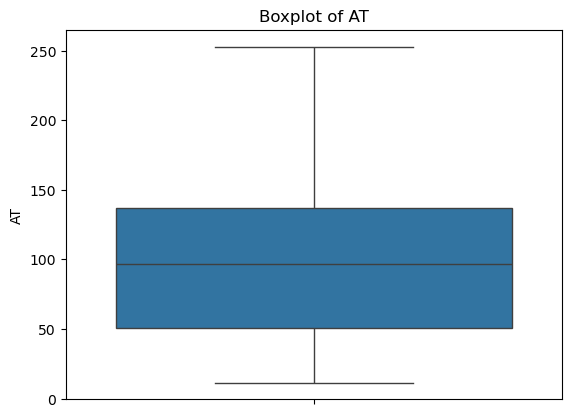

In [38]:
# Boxplot

sns.boxplot(wc_at["AT"])
plt.title("Boxplot of AT")
plt.show()

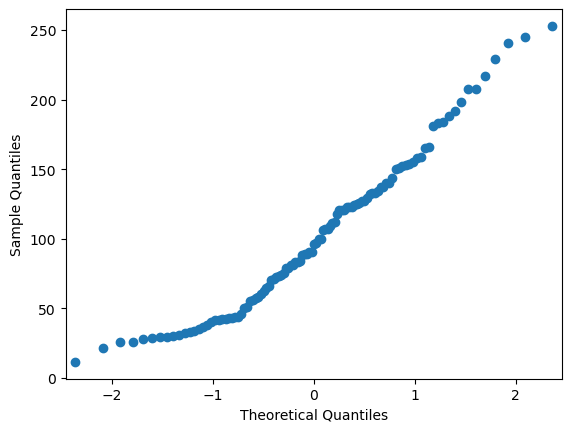

In [39]:
# QQ-Plot

sm.qqplot(wc_at["AT"])
plt.show()

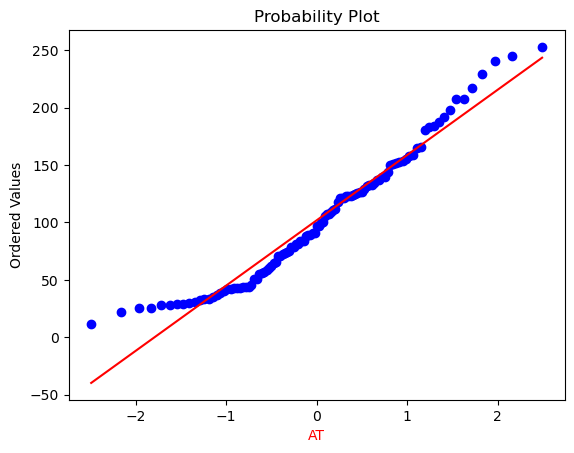

In [40]:
# Probability Plot

stats.probplot(wc_at["AT"],dist="norm",plot=plt)
plt.xlabel("AT",color="red")
plt.show()

#  Question.no 22) 
## Calculate the Z scores of 90% confidence interval,94% confidence interval, 60% confidence interval 

In [41]:
# Z-score of 60% confidence interval

stats.norm.ppf(0.8)

0.8416212335729143

In [42]:
# Z-score of 90% confidence interval 

stats.norm.ppf(0.95)


1.6448536269514722

In [43]:
# Z-score of 94% confidence interval

stats.norm.ppf(0.97)


1.8807936081512509

#  Questionno: 23
## Calculate the t scores of 95% confidence interval, 96% confidence interval, 99% confidence interval for sample size of 25

In [44]:
# t scores of 95% confidence interval for sample size of 25

stats.t.ppf(0.975,24) #df-n-1=24

2.0638985616280205

In [45]:
# t scores of 96% confidence interval for sample size of 25

stats.t.ppf(0.98,24)


2.1715446760080677

In [46]:
# t scores of 99% confidence interval for sample size of 25

stats.t.ppf(0.995,24)


2.796939504772804

#    Question no: 24 
## A Government company claims that an average light bulb lasts 270 days. A researcher randomly selects 18 bulbs for testing. The sampled bulbs last an average of 260 days, with a standard deviation of 90 days. If the CEO's claim were true, what is the probability that 18 randomly selected bulbs would have an average life of no more than 260 days



### Assume Null Hypothesis is: Ho = Avg life of Bulb >= 260 days

### Alternate Hypothesis is: Ha = Avg life of Bulb < 260 days

In [47]:
# find t-scores at x=260; t=(s_mean-P_mean)/(s_SD/sqrt(n))
 
t=(260-270)/(90/18**0.5)
t

-0.4714045207910317

In [48]:
# Method-2 

t_value=(260-270)/(90/np.sqrt(18))
t_value

-0.4714045207910317

### Find P(X>=260) for null hypothesis

 

In [49]:
# p_value=1-stats.t.cdf(abs(t_scores),df=n-1)... Using cdf function

p_value=1-stats.t.cdf(abs(-0.4714),df=17)
p_value

0.32167411684460556

In [50]:
#  Method-2

1-stats.t.cdf(abs(t_value),df = 17)


0.32167253567098353

In [51]:
# p_value=1-stats.t.cdf(abs(t_scores),df=n-1)... Using cdf function

p_value=1-stats.t.cdf(abs(-0.4714),df=17)
p_value

0.32167411684460556